Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [1]:
import sys

sys.path.append("../src/")

# Models
from utils.param_utils import get_ca_init_idx
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
from utils.RWRunMultiruns import RWRunMultiruns
from utils.EMERunMultiruns import EMERunMultiruns
from utils.RWPlotMultiruns import RWPlotMultiruns
from utils.EMEPlotMultiruns import EMEPlotMultiruns

In [2]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [3]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # NOTE: only used in SpectralRxnDiffusion
n_runs = 100  # number of runs for multirun simulations (stochastic)

In [4]:
print("Running simulations with the following parameters:")
print("n_particles: ", n_particles)
print("n_space_pts: ", n_space_pts)
print("n_time_pts: ", n_time_pts)
print("ca_init_idx: ", ca_init_idx)
print("n_eigenmodes: ", n_eigenmodes)
print("n_runs: ", n_runs)

Running simulations with the following parameters:
n_particles:  50
n_space_pts:  101
n_time_pts:  100
ca_init_idx:  59
n_eigenmodes:  101
n_runs:  100


### FINITE DIFFERENCE

Stability condition satisfied: 1 <= 3.6363636363636362
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


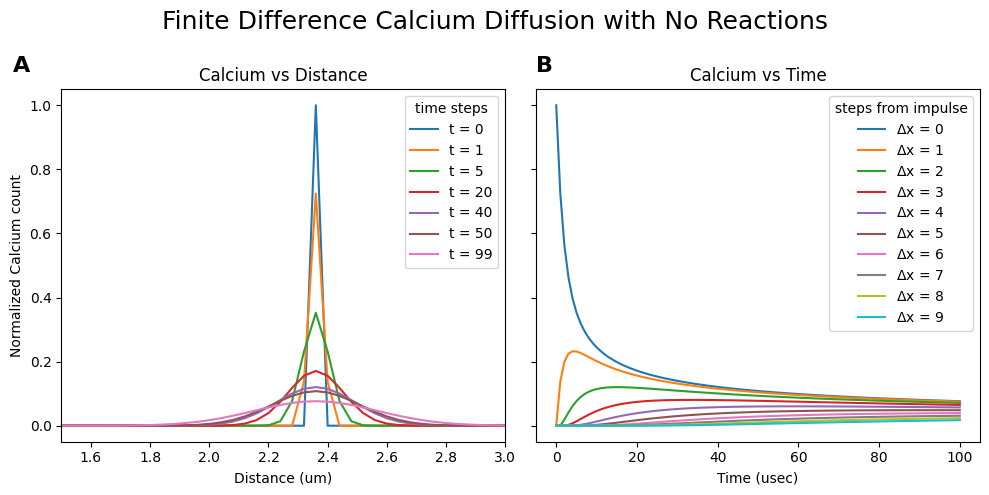

In [5]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)

fd.simulate_diffusion()
fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### SPECTRAL

Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


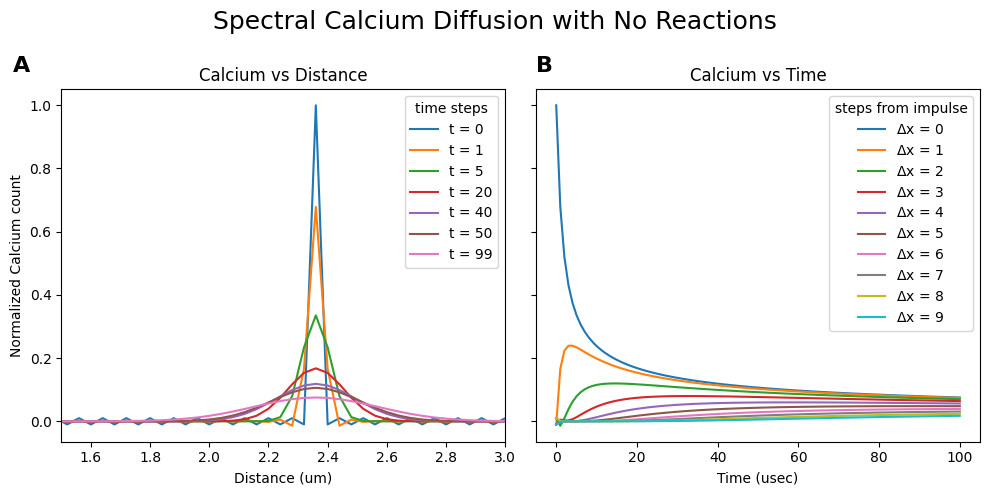

In [6]:
# SPECTRAL
# DETERMINISTIC AND MODAL
# NOTE: SRD has internal number of particles == 5275

sd = srd.SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)

sd.simulate_diffusion()
sd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### RANDOM WALK

In [7]:
# RANDOM WALK
# STOCHASTIC AND NODAL
multi_rw = RWRunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx,
)

dir = multi_rw.run_multi(data_dir="../data")

Made new directory: ../data/eme-validation/random-walk/20240422_121514/
RUNNING SIMULATION 0
RUNNING SIMULATION 10
RUNNING SIMULATION 20
RUNNING SIMULATION 30
RUNNING SIMULATION 40
RUNNING SIMULATION 50
RUNNING SIMULATION 60
RUNNING SIMULATION 70
RUNNING SIMULATION 80
RUNNING SIMULATION 90


Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


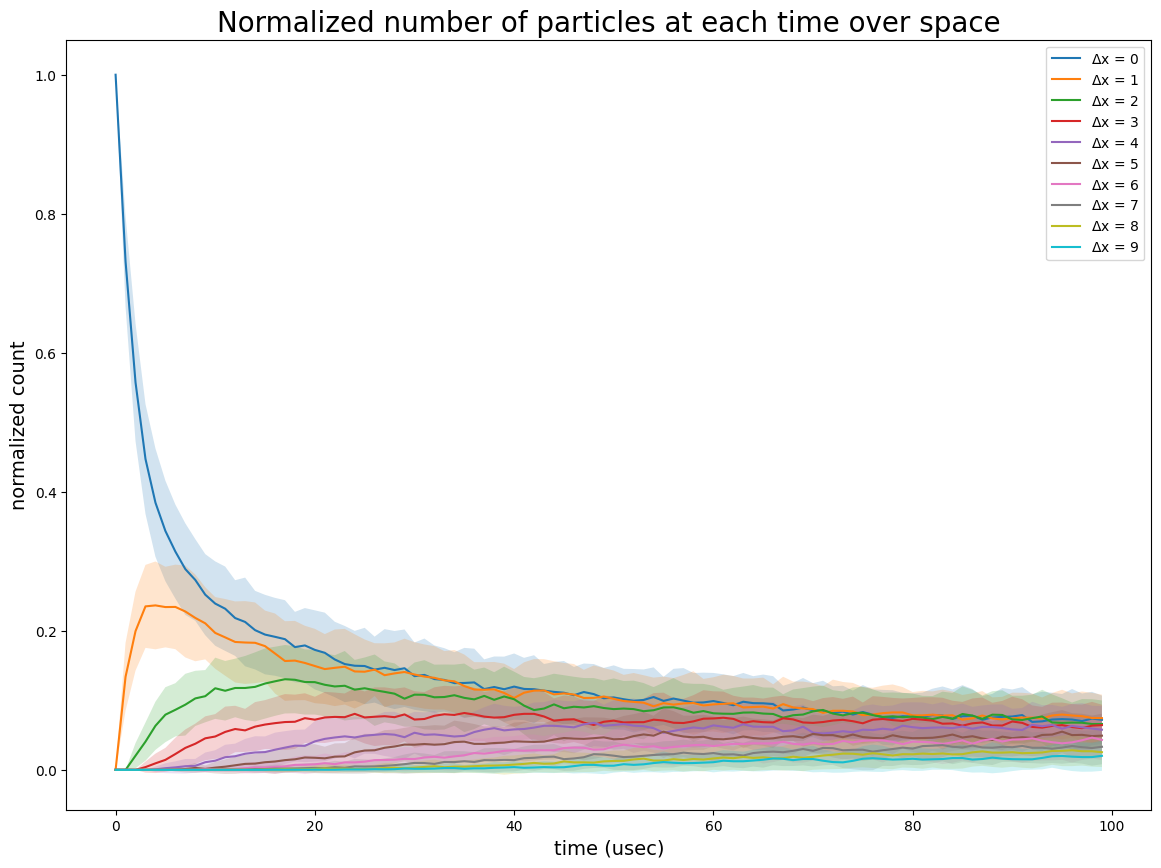

In [8]:
plotter = RWPlotMultiruns(
    dir=dir,
)

plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


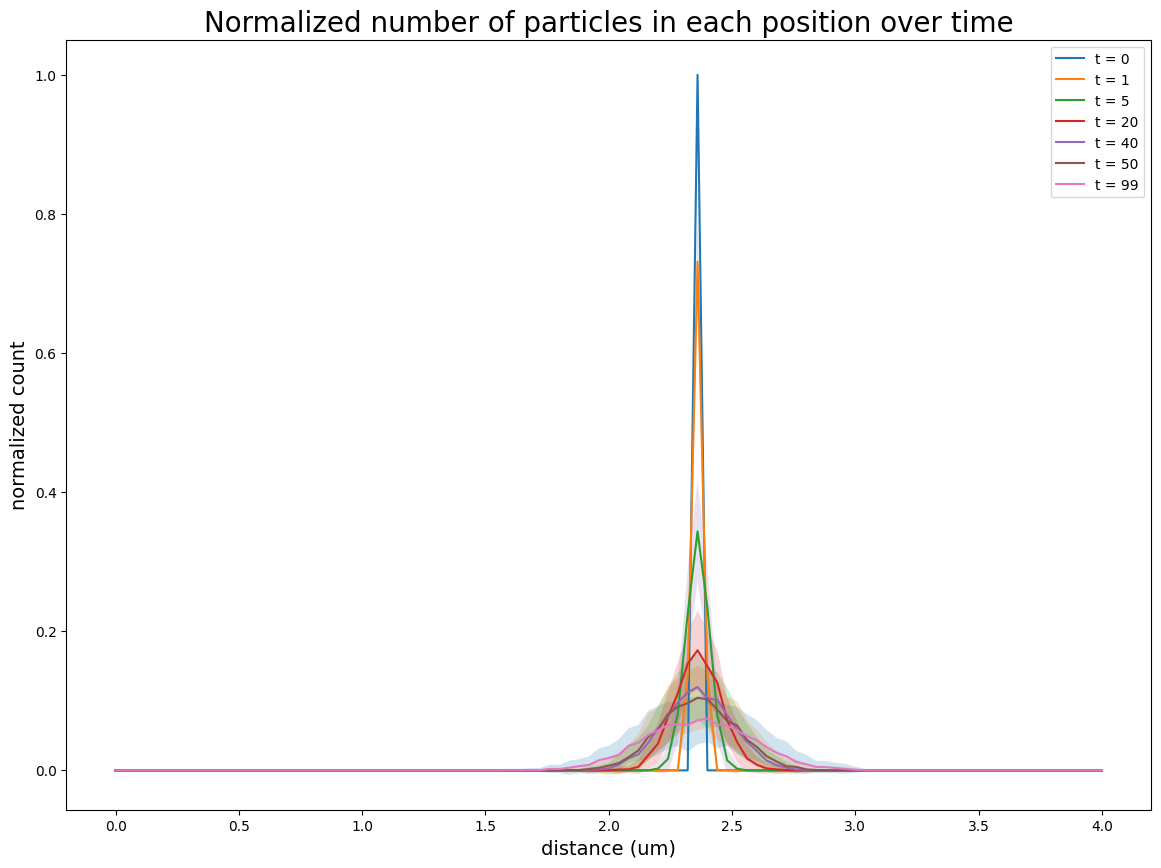

In [9]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])

### EIGENMARKOV

In [10]:
# EIGENMARKOV
# STOCHASTIC AND MODAL
multi_eme = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
)

dir = multi_eme.run_multi(data_dir="../data", normalize=False)

Made new directory: ../data/eme-validation/markov-eme/20240422_121516/
RUNNING SIMULATION 0
INITIAL CONDITIONS
[ 0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.          0.         -0.
  6.18246519  4.93634778  0.          0.          0.32816064  6.66404133
  0.87315578  0.          6.95105432  0.          0.          0.
  0.          4.01073297  4.44769639  0.          5.16481779  0.
  0.          0.          0.65560704  6.55150676  0.          0.
  6.5906154   6.89265831  0.          0.          6.07501392  1.73281234
  0.          2.15341133  5.84258946  2.8684519   0.          0.9816265
  6.42471277  4.53194504  3.92034423  6.69834085  0.          0.
  6.23395417  4.85777831  0.          7.01471304  0.          0.
  5.65338484  1.94405221  5.96168546  0.          0.          0.
  0.          0.          0.          0.          0.          6.62812995
  4.77803388  5.78091442  2.25732224  0.          0.          0.
  0.         

In [ ]:
plotter = EMEPlotMultiruns(
    dir=dir, file_id="eme", impulse_idx=ca_init_idx, n_particles_impulse=n_particles
)

Preparing to plot simulation data...
ARGMAX INDEX: 	 59 	 (49.74)
ALLEGED START LOC: 	 59 	 (50)
Plotting simulation data...
Beautifying plot...


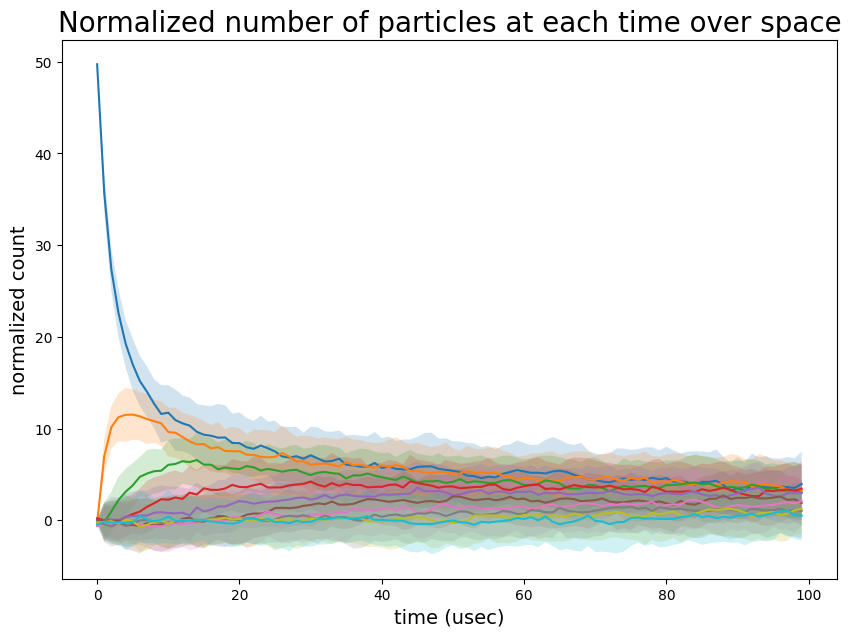

In [ ]:
plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


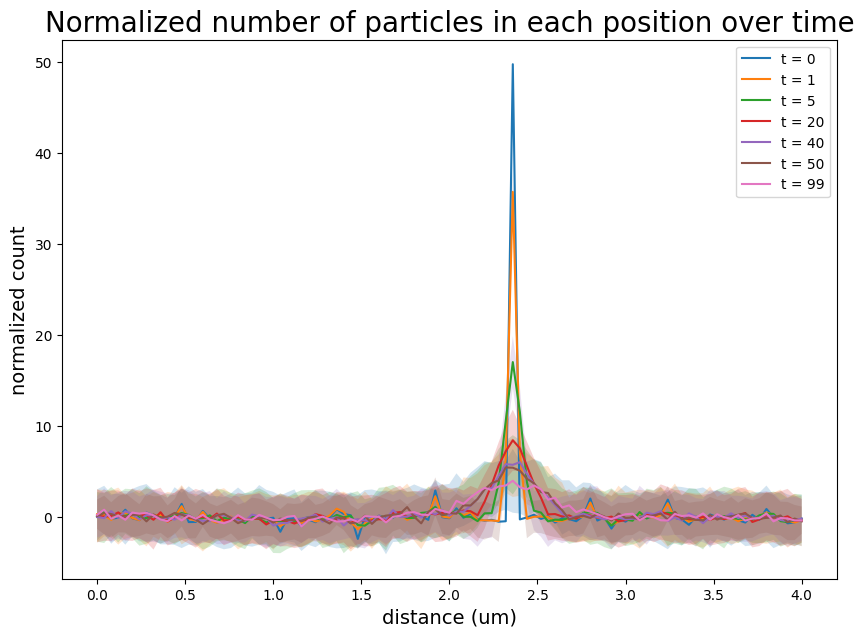

In [ ]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])